## Week 4, Lab 1: Predicting Left-Handedness from Psychological Factors
> Author: Matt Brems

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

We'll walk through a full data science problem in this lab. 
- However, there are some additional questions along the way that don't fit neatly into the one main example we'll walk through. Any question that isn't explicitly part of the main example is marked with **(detour)** at the start of the question.

---
## Step 1: Define The Problem.

You're currently a data scientist working at a university. A professor of psychology is attempting to study the relationship between personalities and left-handedness. They have tasked you with gathering evidence so that they may publish.

Specifically, the professor says "I need to prove that left-handedness is caused by some personality trait. Go find that personality trait and the data to back it up."

As a data scientist, you know that any real data science problem must be **specific** and **conclusively answerable**. For example:
- Bad data science problem: "What is the link between obesity and blood pressure?"
    - This is vague and is not conclusively answerable. That is, two people might look at the conclusion and one may say "Sure, the problem has been answered!" and the other may say "The problem has not yet been answered."
- Good data science problem: "Does an association exist between obesity and blood pressure?"
    - This is more specific and is conclusively answerable. The problem specifically is asking for a "Yes" or "No" answer. Based on that, two independent people should both be able to say either "Yes, the problem has been answered" or "No, the problem has not yet been answered."
- Excellent data science problem: "As obesity increases, how does blood pressure change?"
    - This is very specific and is conclusively answerable. The problem specifically seeks to understand the effect of one variable on the other.

### 1. In the context of the left-handedness and personality example, what are three specific and conclusively answerable problems that you could answer using data science? 

> You might find it helpful to check out the codebook in the repo for some inspiration.

Answer:
(Answers may vary.)

As one's response to Q1 increases, are people more or less likely to be left-handed?

Does the distribution of handedness vary based one's response to Q1?

Which question (Q1-Q44) has the highest association with left-handedness?

---
## Step 2: Obtain the data.

### 2. Read in the file titled "data.csv."
> Hint: Despite being saved as a .csv file, you won't be able to simply `pd.read_csv()` this data!

In [209]:
import pandas as pd


df =  pd.read_table("./data.csv")

In [210]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,...,US,2,1,22,3,1,1,3,2,3
1,1,5,1,4,2,5,5,4,1,5,...,CA,2,1,14,1,2,2,6,1,1
2,1,2,1,1,5,4,3,2,1,4,...,NL,2,2,30,4,1,1,1,1,2
3,1,4,1,5,1,4,5,4,3,5,...,US,2,1,18,2,2,5,3,2,2
4,5,1,5,1,5,1,5,1,3,1,...,US,2,1,22,3,1,1,3,2,3


### 3. Suppose that, instead of us giving you this data in a file, you were actually conducting a survey to gather this data yourself. From an ethics/privacy point of view, what are three things you might consider when attempting to gather this data?
> When working with sensitive data like sexual orientation or gender identity, we need to consider how this data could be used if it fell into the wrong hands!

Answer: (Answers may vary.)

We should question whether or not we need to gather the sexual orientation/gender identity data. If it is necessary for what we want to study, then we need to be smart about including it. If it not necessary, then we should not be gathering this data!

If the survey is not optional already, make it optional. If we're only including surveys that are complete, we should allow for people to complete only certain questions instead of making all questions required.
We should collect this data anonymously, not confidentially.

Anonymously means we do not collect personally identifiable information (PII).

Confidential means we collect PII but we don't make that available to others.

If we have access to names or social security numbers, it means that someone could hack us and connect names/SSNs with gender, orientation, etc. Instead, we should collect the data without names or anything so that even if our data are hacked, it is much harder to connect responses with an individual.

From the perspective of inclusivity, we want to make sure our responses fit everyone trying to respond. For example, for the gender category, we should at minimum have a male, female, and other category. However, we might consider including options for transgender individuals, having only a fill-in-the-blank response instead of explicit choices, and/or having "prefer to not answer" category.

For a particularly advanced option, there's an area of study called differential privacy that allows us to study population-level effects without exposing any individual. Consider the following example:
Have each respondent flip a coin.

If the respondent flips heads, have them answer the "gender" question honestly.

If the respondent flips tails, have them answer the "gender" question with "transgender."

This way, an individual who answers "transgender" may or may not actually be transgender. Someone who hacks the data would never be able to know who truly identifies as transgender versus who identifies as transgender based on the coin flip. However, because we know approximately how many coin flips should be heads versus tails, we can estimate the percentage of individuals who are transgender. This allows us to study what we want to study but also allows us to maintain privacy for individuals!

---
## Step 3: Explore the data.

### 4. Conduct exploratory data analysis on this dataset.
> If you haven't already, be sure to check out the codebook in the repo, as that will help in your EDA process.

In [211]:
df.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44', 'introelapse', 'testelapse', 'country',
       'fromgoogle', 'engnat', 'age', 'education', 'gender', 'orientation',
       'race', 'religion', 'hand'],
      dtype='object')

In [212]:
df.isnull().sum().sum()

0

In [213]:
df.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,testelapse,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
count,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,...,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000
mean,1.962715,3.829589,2.846558,3.186902,2.865440,3.672084,3.216539,3.184512,2.761233,3.522945,...,479.994503,1.576243,1.239962,30.370698,2.317878,1.654398,1.833413,5.013623,2.394359,1.190966
std,1.360291,1.551683,1.664804,1.476879,1.545798,1.342238,1.490733,1.387382,1.511805,1.242890,...,3142.178542,0.494212,0.440882,367.201726,0.874264,0.640915,1.303454,1.970996,2.184164,0.495357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.000000,1.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,1.000000,2.000000,1.000000,3.000000,2.000000,2.000000,1.000000,3.000000,...,186.000000,1.000000,1.000000,18.000000,2.000000,1.000000,1.000000,5.000000,1.000000,1.000000
50%,1.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,...,242.000000,2.000000,1.000000,21.000000,2.000000,2.000000,1.000000,6.000000,2.000000,1.000000
75%,3.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,...,324.250000,2.000000,1.000000,27.000000,3.000000,2.000000,2.000000,6.000000,2.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,119834.000000,2.000000,2.000000,23763.000000,4.000000,3.000000,5.000000,7.000000,7.000000,3.000000


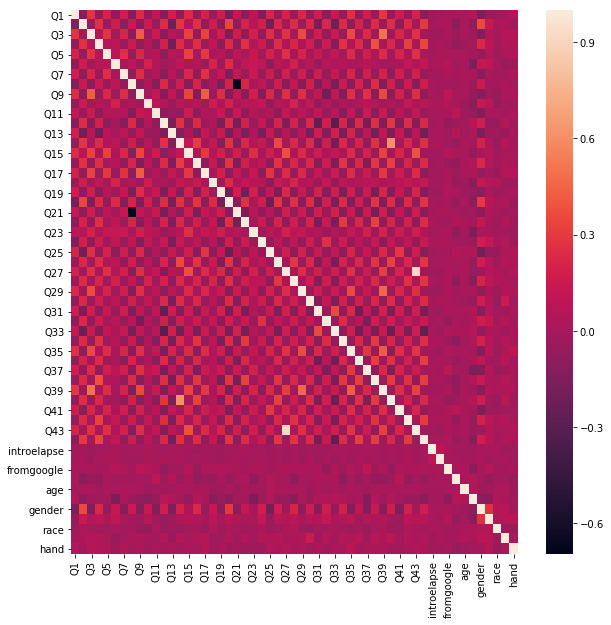

In [214]:
import seaborn as sns 
import matplotlib.pyplot as plt
% matplotlib inline

fig, ax = plt.subplots(figsize=(10,10))   
sns.heatmap(df.corr())    #yeehhhh that's not super helpful...

---
## Step 4: Model the data.

### 5. Suppose I wanted to use Q1 - Q44 to predict whether or not the person is left-handed. Would this be a classification or regression problem? Why?

This would be a classification problem. The output (whether or not the person is left-handed) is discrete. 

### (detour) 6. While this isn't the problem we set out to solve, suppose I wanted to predict the age of the respondent using Q1 - Q44 as my predictors. Would this be a classification or regression problem? Why?

 This would be a regression problem. The output (the age of the person) is continuous.
 
 Even though the age is recorded rounded to the nearest number, we'd probably still treat this as continuous. However, it's possible (albeit unlikely) that we might treat it as discrete.

### 7. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed based on their responses to Q1 - Q44. Before doing that, however, you remember that it is often a good idea to standardize your variables. In general, why would we standardize our variables? Give an example of when we would standardize our variables.

Answer: When we want to put our variables on the same scale, we often will standardize them. An explicit example might be predicting income based on GPA and square footage of one's house. If we built a linear regression model predicting income from GPA and square feet, the coefficient from GPA would probably be quite large (because a one-unit change in GPA is substantial) whereas the coefficient from square feet would probably be quite small (because a one-unit change in square feet is almost negligible). If we plan to regularize, the GPA coefficient will be penalized just because it's large whereas the square feet coefficient will probably not be affected much at all.

In the context of $k$-nearest neighbors, it's especially important to standardize our variables. If we're trying to see which observations are "close" to one another and we have two variables that are on very different scales, then one variable will make observations look close to one another. For example, observations will look close based on GPA but far away based on square footage. The nearest neighbors will be almost entirely determined by square footage and not by GPA. 

### 8. Give an example of when we might not standardize our variables.

Answer: If our variables are already on the same scale, it doesn't make sense to standardize them. If we want to interpret our variables on their original scale, standardizing will make that interpretation more difficult.

### 9. Based on your answers to 7 and 8, do you think we should standardize our predictor variables in this case? Why or why not?

Answer: If we're only using Q1-Q44 as predictors, I would probably not standardize our predictor variables. They're already on the same scale (1 to 5) and I might want the interpretability of a one-unit increase in the response to an individual question.

### 10. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed. What munging/cleaning do we need to do to our $y$ variable in order to explicitly answer this question? Do it.

Answer: 

We want to predict whether or not a person is left-handed. Looking at df['hand'].value_counts(), we have four categories. Instead, I want to convert everything to 1s and 0s. Specifically, I'll map 2 (left-handed) to be 1 and I'll map everything else (0, 1, 3) to be 0.

Note: Some people may interpret ambidextrous to be included in left-handed. While I did not do that here, there are two points I want to make.

This speaks to the importance of how you word your problem statement! Be sure to be as explicit as possible to minimize any confusion among peers.

Because the proportion of people who are ambidextrous is so low, it's unlikely that this will substantially affect our model. (Our proportion of 1s would increase from about 11% to 15%.)

I have dropped the 11 "missing" values of 0. This misay be a valid thing to do in this case, because we do not know whether the 0 refers to "left-handed" or "not left-handed" and it may not make sense to include them where our predicted value is missing. However, given that the proportion of 0s is so low, it's unlikely that this will substantially affect our model.

In [215]:
df['hand'].value_counts()

1    3542
2     452
3     179
0      11
Name: hand, dtype: int64

In [216]:
df = df[(df[['hand']] != 0).all(axis=1)]
#dropping the 0 responses

In [217]:
df.hand.value_counts()

1    3542
2     452
3     179
Name: hand, dtype: int64

In [218]:
df['y'] = [1 if i == 2 else 0 for i in df['hand']]   #here we're making 1 to be left handed and 0 to be right handed. 

In [219]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand,y
0,4,1,5,1,5,1,5,1,4,1,...,2,1,22,3,1,1,3,2,3,0
1,1,5,1,4,2,5,5,4,1,5,...,2,1,14,1,2,2,6,1,1,0
2,1,2,1,1,5,4,3,2,1,4,...,2,2,30,4,1,1,1,1,2,1
3,1,4,1,5,1,4,5,4,3,5,...,2,1,18,2,2,5,3,2,2,1
4,5,1,5,1,5,1,5,1,3,1,...,2,1,22,3,1,1,3,2,3,0


In [220]:
df['y'].value_counts()


0    3721
1     452
Name: y, dtype: int64

In [221]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand,y
0,4,1,5,1,5,1,5,1,4,1,...,2,1,22,3,1,1,3,2,3,0
1,1,5,1,4,2,5,5,4,1,5,...,2,1,14,1,2,2,6,1,1,0
2,1,2,1,1,5,4,3,2,1,4,...,2,2,30,4,1,1,1,1,2,1
3,1,4,1,5,1,4,5,4,3,5,...,2,1,18,2,2,5,3,2,2,1
4,5,1,5,1,5,1,5,1,3,1,...,2,1,22,3,1,1,3,2,3,0


### 11. The professor for whom you work suggests that you set $k = 4$. Why might this be a bad idea in this specific case?

Having an even number of categories may lead us to having ties when predicting a discrete output. For example, maybe two nearest neighbors are right-handed and two nearest neighbors are left-handed. Any prediction in this case would be arbitrary, because it's equally likely (based on the data) for that individual to be left- or right-handed. It is almost always a good option to pick an odd value for $k$ that is not divisible by the number of categories you seek to predict!

### 12. Let's *(finally)* use $k$-nearest neighbors to predict whether or not a person is left-handed!

> Be sure to create a train/test split with your data!

> Create four separate models, one with $k = 3$, one with $k = 5$, one with $k = 15$, and one with $k = 25$.

> Instantiate and fit your models.

In [222]:
X = df.drop(columns=['introelapse', 'testelapse', 'country',
       'fromgoogle', 'engnat', 'age', 'education', 'gender', 'orientation',
       'race', 'religion', 'hand', 'y'], axis = 1)

y = df['y']

In [223]:
from sklearn.model_selection import train_test_split

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

In [225]:
from sklearn.neighbors import KNeighborsClassifier


In [226]:
k_3 = KNeighborsClassifier(n_neighbors = 3)
k_3.fit(X_train, y_train)

k_5 = KNeighborsClassifier(n_neighbors = 5)
k_5.fit(X_train, y_train)

k_15 = KNeighborsClassifier(n_neighbors = 15)
k_15.fit(X_train, y_train)

k_25 = KNeighborsClassifier(n_neighbors = 25)
k_25.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=25, p=2,
           weights='uniform')

In [227]:
k_3.score(X_test, y_test)

0.85558780841799709

Being good data scientists, we know that we might not run just one type of model. We might run many different models and see which is best.

### 13. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, let's check the [documentation for logistic regression in sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Is there default regularization? If so, what is it? If not, how do you know?

Surprisingly, there is default regularization!

penalty = 'l2' indicates the L2 or Ridge penalty.
C = 1.0 indicates that the inverse of our regularization strength is 1. Note that $C = \frac{1}{\alpha} \Rightarrow 1 = \frac{1}{\alpha} \Rightarrow \alpha = 1$.

### 14. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, should we standardize our features? Well, the answer is (as always), **it depends**. What is one reason you would standardize? What is one reason you would not standardize?

Answer:


An example of when I would standardize in logistic regression is if I wanted to implement regularization. If I did not regularize, I would improperly penalize coefficients simply for the scale of their variables.

An example of when I would not standardize in logistic regression is when I want to maintain interpretability of my variables or if my variables are already on the same scale.


### 15. Let's use logistic regression to predict whether or not the person is left-handed.


> Be sure to use the same train/test split with your data as with your $k$NN model above!

> Create four separate models, one with LASSO and $\alpha = 1$, one with LASSO and $\alpha = 10$, one with Ridge and $\alpha = 1$, and one with Ridge and $\alpha = 10$. *(Hint: Be careful with how you specify $\alpha$ in your model!)*

> Instantiate and fit your models.

In [228]:
from sklearn.linear_model import LogisticRegression

In [229]:
lasso_1 = LogisticRegression(penalty = 'l1', C = 1.0)     #penalty indicates what kind of regularization, C indicates the chosen alpha
lasso_1.fit(X_train, y_train)

lasso_10 = LogisticRegression(penalty = 'l1', C = 0.1)  #C is the inverse, so if we want an alpha of 10, we put 0.1 (or 1/10)
lasso_10.fit(X_train, y_train)

ridge_1 = LogisticRegression(penalty = 'l2', C = 1.0)
ridge_1.fit(X_train, y_train)

ridge_10 = LogisticRegression(penalty = 'l2', C = 0.1)
ridge_10.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### (detour) 16. Suppose that, instead of predicting whether or not someone was left-handed, you wanted to predict whether someone was right-handed, left-handed, both, or missing. What type of *(hint: generalized linear)* model would you try to fit here? Why?

We would probably try fitting a multinomial logistic regression model. In this case, we want to predict a discrete output with unordered classes. Multinomial models are well-suited for multiple, unordered classes.

### (detour) 17. Suppose that, instead of predicting whether or not someone was left-handed, you wanted to predict someone's level of education *(1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree)* based on their personality question responses. What type of *(hint: generalized linear)* model would you try to fit here? Why?

We would probably try fitting a multinomial ordinal logistic regression model. In this case, we want to predict a discrete output with ordered classes. Multinomial models are well-suited for multiple classes but we want to take into account the ordered nature of our $Y$ variable.

### (detour) 18. Suppose that, instead of predicting whether or not someone was left-handed, you wanted to predict someone's age based on their personality question responses. Realistically, we would probably fit a multiple linear regression model. However, if I tried to fit a GLM here, what type of model would be most appropriate? Why?

Answer: We would probably try fitting a Poisson regression model. In this case, we want to predict a discrete output that takes on values of $\{0, 1, 2, \ldots\}$. Poisson regression models are well-suited when our $Y$ output is a count of something.

---
## Step 5: Evaluate the model(s).

### 19. Using accuracy as your metric, evaluate all eight of your models on both the training and testing sets. Put your scores below. (If you want to be fancy and generate a table in Markdown, there's a [Markdown table generator site linked here](https://www.tablesgenerator.com/markdown_tables#).)

In [230]:
print("k-nearest neighbors training accuracy with k = 3: " + str(k_3.score(X_train, y_train)))
print("k-nearest neighbors testing accuracy with k = 3: " + str(k_3.score(X_test, y_test)))

print("k-nearest neighbors training accuracy with k = 5: " + str(k_5.score(X_train, y_train)))
print("k-nearest neighbors testing accuracy with k = 5: " + str(k_5.score(X_test, y_test)))

print("k-nearest neighbors training accuracy with k = 15: " + str(k_15.score(X_train, y_train)))
print("k-nearest neighbors testing accuracy with k = 15: " + str(k_15.score(X_test, y_test)))

print("k-nearest neighbors training accuracy with k = 25: " + str(k_25.score(X_train, y_train)))
print("k-nearest neighbors testing accuracy with k = 25: " + str(k_25.score(X_test, y_test)))

print("logistic regression training accuracy with LASSO penalty, alpha = 1: " + str(lasso_1.score(X_train, y_train)))
print("logistic regression testing accuracy with LASSO penalty, alpha = 1: " + str(lasso_1.score(X_test, y_test)))

print("logistic regression training accuracy with LASSO penalty, alpha = 10: " + str(lasso_10.score(X_train, y_train)))
print("logistic regression testing accuracy with LASSO penalty, alpha = 10: " + str(lasso_10.score(X_test, y_test)))

print("logistic regression training accuracy with Ridge penalty, alpha = 1: " + str(ridge_1.score(X_train, y_train)))
print("logistic regression testing accuracy with Ridge penalty, alpha = 1: " + str(ridge_1.score(X_test, y_test)))

print("logistic regression training accuracy with Ridge penalty, alpha = 10: " + str(ridge_10.score(X_train, y_train)))
print("logistic regression testing accuracy with Ridge penalty, alpha = 10: " + str(ridge_10.score(X_test, y_test)))

k-nearest neighbors training accuracy with k = 3: 0.904830053667
k-nearest neighbors testing accuracy with k = 3: 0.855587808418
k-nearest neighbors training accuracy with k = 5: 0.889803220036
k-nearest neighbors testing accuracy with k = 5: 0.88388969521
k-nearest neighbors training accuracy with k = 15: 0.889445438283
k-nearest neighbors testing accuracy with k = 15: 0.894775036284
k-nearest neighbors training accuracy with k = 25: 0.889803220036
k-nearest neighbors testing accuracy with k = 25: 0.895500725689
logistic regression training accuracy with LASSO penalty, alpha = 1: 0.890161001789
logistic regression testing accuracy with LASSO penalty, alpha = 1: 0.895500725689
logistic regression training accuracy with LASSO penalty, alpha = 10: 0.890161001789
logistic regression testing accuracy with LASSO penalty, alpha = 10: 0.895500725689
logistic regression training accuracy with Ridge penalty, alpha = 1: 0.890161001789
logistic regression testing accuracy with Ridge penalty, alph

In [231]:
###Luckily we now know we can do something similar with GridSearchCV!

### 20. In which of your $k$-NN models is there evidence of overfitting? How do you know?

Remember that we overfit when our model is too closely matched to the training data and thus generalizes poorly to (held-out) testing data. Evidence of this is when our training score is better than our testing score. In this case, we see that our training score is better than our testing score when $k = 3$ and $k = 5$.

### 21. Broadly speaking, how does the value of $k$ in $k$-NN affect the bias-variance tradeoff? (i.e. As $k$ increases, how are bias and variance affected?)

As $k$ increases, our bias increases and our variance decreases.
As $k$ decreases, our bias decreases and our variance increases.

### 22. If you have a $k$-NN model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

1. We can increase $k$ in order to decrease variance.

2. We can pick a less flexible model than $k$-nearest neighbors. One example of that would be logistic regression. (Logistic regression makes more simplifying assumptions than $k$-nearest neighbors - for example, linear relationship between X and logit of Y.)

3. We can reduce the number of questions we include as predictors. (For example, maybe some of our questions are correlated with one another, which adds unnecessary complexity to our model.)

### 22. In which of your logistic regression models is there evidence of overfitting? How do you know?

All of our logistic regression models have similar training scores and testing scores. There is no evidence of overfitting from these models, because our training scores are worse than our testing scores.

### 23. Broadly speaking, how does the value of $C$ in logistic regression affect the bias-variance tradeoff? (i.e. As $C$ increases, how are bias and variance affected?)

As $C$ increases, we regularize less. If we regularize less, then our variance increases and our bias decreases.

As $C$ decreases, we regularize more. If we regularize more, then our variance decreases and our bias increases.

### 24. If you have a logistic regression model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

Manually remove features from my model.

Increase the regularization strength and/or consider using LASSO regularization if not already doing so.

Attempt to gather more data, although this is likely to be an expensive and time-consuming approach to reducing variance.

---
## Step 6: Answer the problem.

### 25. Suppose you want to understand which psychological features are most important in determining left-handedness. Would you rather use $k$-NN or logistic regression? Why?

Answer:

I would prefer to use logistic regression. A logistic regression model would allow us to understand the effect of psychological features on left-handedness. Specifically, we can estimate coefficients that tell us the impact of a one-unit change in psychological factors on whether or not people are left-handed. $k$-nearest neighbors does not provide us with a similar way to understaand how individual features affect left-handedness.

### 26. Select your best logistic regression model. Interpret the coefficient for `Q1`.

In [232]:
import numpy as np

ridge_10.coef_


array([[-0.00327755, -0.01014761, -0.05208712, -0.03922684,  0.03857957,
         0.00054775,  0.00316324, -0.1988127 , -0.0055575 ,  0.02081225,
         0.00695811, -0.01362908, -0.04210941,  0.05023149, -0.04106868,
         0.0438933 ,  0.0198725 , -0.04344073,  0.00932258, -0.05746183,
        -0.06161947, -0.09825349, -0.01549501, -0.04612412,  0.05077415,
         0.08582026,  0.08110638, -0.03887503,  0.05288334,  0.0133616 ,
         0.01895573,  0.01955334, -0.04855088, -0.03776209,  0.01148444,
        -0.03231538, -0.01124687,  0.11713967, -0.06472686, -0.09876226,
        -0.05505446, -0.04664403, -0.18234361,  0.05652661]])

In [233]:
list(zip(np.exp(ridge_10.coef_[0]),X.columns))

[(0.9967278169759588, 'Q1'),
 (0.98990370039572106, 'Q2'),
 (0.94924616874168066, 'Q3'),
 (0.96153256946782917, 'Q4'),
 (1.0393334248781561, 'Q5'),
 (1.0005478978154267, 'Q6'),
 (1.0031682504318269, 'Q7'),
 (0.81970341138007752, 'Q8'),
 (0.99445791107004666, 'Q9'),
 (1.021030335832994, 'Q10'),
 (1.0069823777222484, 'Q11'),
 (0.98646337812618401, 'Q12'),
 (0.95876487907275487, 'Q13'),
 (1.0515144788416277, 'Q14'),
 (0.95976320733652709, 'Q15'),
 (1.0448708653825596, 'Q16'),
 (1.0200712748721308, 'Q17'),
 (0.95748930408048882, 'Q18'),
 (1.0093661734944115, 'Q19'),
 (0.94415792627281592, 'Q20'),
 (0.94024060478444493, 'Q21'),
 (0.90641910709907414, 'Q22'),
 (0.98462441864862471, 'Q23'),
 (0.95492342711650802, 'Q24'),
 (1.0520852508234133, 'Q25'),
 (1.0896104639503346, 'Q26'),
 (1.0844862586030382, 'Q27'),
 (0.96187090422390586, 'Q28'),
 (1.0543066389239208, 'Q29'),
 (1.0134512642830615, 'Q30'),
 (1.0191365348690145, 'Q31'),
 (1.019745753667028, 'Q32'),
 (0.95260887208482781, 'Q33'),
 (0.9

We can interpret the coefficient for Q1 in one of three ways.

As the value for Q1 increases by 1, the log-odds of being left-handed decreases by 0.003.
As the value for Q1 increases by 1, an individual is 99.67% as likely to be left-handed.
As the value for Q1 increases by 1, an individual is 0.33% less likely to be left-handed.

### 27. If you have to select one model overall to be your *best* model, which model would you select? Why?

Answer:

I would probably select my logistic regression model. Our accuracy is going to be high because we can always just predict "not left-handed" and we'll be right like 90% of the time. If I want to understand what (if any) features predict left-handedness, logistic regression is better for this type of problem than $k$-nearest neighbors. 

### 28. Circle back to the three specific and conclusively answerable questions you came up with in Q1. Answer these for the professor based on the model you selected!

1. As one's response to Q1 increases, are people more or less likely to be left-handed?
Answer: As one's answer to Q1 increases by 1, they are 1.25% less likely to be left-handed.

2. Does the distribution of handedness vary based one's response to Q1?

In [234]:
# 2. Does the distribution of handedness vary based one's response to Q1

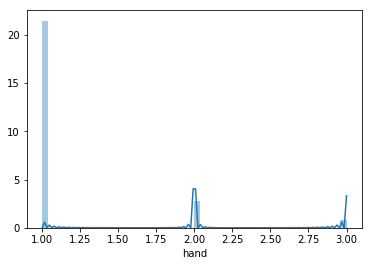

In [235]:
sns.distplot(df[df['Q1'] == 1]['hand']);

In [236]:
#If we wanted to try gridsearch on our logistic regression:

In [237]:
from sklearn.model_selection import GridSearchCV

In [238]:
lr = LogisticRegression()

In [239]:
#just carrying down our X and y matrices as reminders:


In [240]:
predictors = list(
    set(df.columns) - set(['introelapse', 'testelapse', 'country',
       'fromgoogle', 'engnat', 'age', 'education', 'gender', 'orientation',
       'race', 'religion', 'hand', 'y'])
)

X = df[predictors]
y = df['y']

In [241]:
X.shape

(4173, 44)

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.33, random_state = 42)

In [243]:
lr = LogisticRegression()

In [244]:
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.890161001789
0.895500725689


In [245]:
parameters  = {'C': [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 1, 5, 10],
              'class_weight': [None, 'balanced'],
              'penalty': ['l1', 'l2']}

In [246]:
gs = GridSearchCV(estimator = lr, 
                          param_grid = parameters, cv=5).fit(X_train, y_train)                          

In [247]:
lr_gs = gs.best_estimator_

In [248]:
lr_gs.score(X_train, y_train)

0.89016100178890878

In [249]:
lr_gs.score(X_test, y_test)

0.89550072568940497

In [250]:
###pretty much the same scoring as before, but let's see what our reports look like!

In [251]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [252]:
y_preds = lr_gs.predict(X_test)
y_pp = lr_gs.predict_proba(X_test)

In [253]:
def classifications(y_test, y_preds):
    print('Mean accuracy score %s ' % accuracy_score(y_test, y_preds))
    print(confusion_matrix(y_test, y_preds))
    print(classification_report(y_test, y_preds))

print(classifications(y_test, y_preds))

Mean accuracy score 0.895500725689 
[[1234    0]
 [ 144    0]]
             precision    recall  f1-score   support

          0       0.90      1.00      0.94      1234
          1       0.00      0.00      0.00       144

avg / total       0.80      0.90      0.85      1378

None


/Users/heatherrobbins/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [254]:
#a prettier/less confusing confusion matrix

In [255]:
conmat = np.array(confusion_matrix(y_test, y_preds, labels=[0, 1]))
conmat

array([[1234,    0],
       [ 144,    0]])

In [256]:
confusion = pd.DataFrame(conmat, index=['is_not_lefty', 'is_lefty'],
                         columns=['predicted_not_lefty','predicted_lefty'])
confusion

,predicted_not_lefty,predicted_lefty
is_not_lefty,1234,0
is_lefty,144,0


In [257]:
tn, fp, fn, tp = confusion_matrix(y_test, y_preds).ravel()

In [258]:
print("True Negatives: " + str(tn))
print()
print("False Positives: " + str(fp))
print()
print("False Negatives: " + str(fn))
print()
print("True Positives: " + str(tp))

True Negatives: 1234

False Positives: 0

False Negatives: 144

True Positives: 0


In [266]:
y_test.shape

(1378,)

In [270]:
y_pp[:, 1]

array([ 0.17961248,  0.10052935,  0.10950263, ...,  0.08197378,
        0.13353623,  0.12052865])

In [259]:
from sklearn.metrics import roc_curve, auc

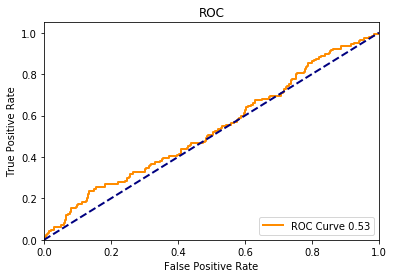

In [273]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

%matplotlib inline

# Generate False positive rate and True positive rate
fpr, tpr, _ = roc_curve(y_test, y_pp[:, 1])
roc_auc = auc(fpr, tpr)

# Plot 
plt.figure()

line_weight = 2
plt.plot(fpr, tpr, color="darkorange", lw = line_weight, label = "ROC Curve %0.2f" % roc_auc)

plt.plot([0, 1], [0, 1], color="navy", lw = line_weight, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [190]:
##So our accuracy score is really good, but we're dealing with unbalanced classes - 
# there are far more right handed people than left, so we're underclassifying our 1's class. 
We're really do no better than random chance here with our model...

# What does it look like when we shift the threshold?

In [280]:
pp = pd.DataFrame(y_pp, columns=['righty','lefty'])
pp.head()

,righty,lefty
0,0.820388,0.179612
1,0.899471,0.100529
2,0.890497,0.109503
3,0.851344,0.148656
4,0.838818,0.161182


In [282]:
for thresh in np.arange(1,100)/100.:
    labeled_lefty = np.array([1 if x >= thresh else 0 for x in pp.lefty.values])
    print('Threshold:', thresh, 'false negatives:', np.sum((y_test == 1) & (labeled_lefty == 0)))

Threshold: 0.01 false negatives: 0
Threshold: 0.02 false negatives: 0
Threshold: 0.03 false negatives: 0
Threshold: 0.04 false negatives: 0
Threshold: 0.05 false negatives: 1
Threshold: 0.06 false negatives: 1
Threshold: 0.07 false negatives: 4
Threshold: 0.08 false negatives: 9
Threshold: 0.09 false negatives: 23
Threshold: 0.1 false negatives: 47
Threshold: 0.11 false negatives: 76
Threshold: 0.12 false negatives: 90
Threshold: 0.13 false negatives: 104
Threshold: 0.14 false negatives: 108
Threshold: 0.15 false negatives: 120
Threshold: 0.16 false negatives: 131
Threshold: 0.17 false negatives: 135
Threshold: 0.18 false negatives: 137
Threshold: 0.19 false negatives: 138
Threshold: 0.2 false negatives: 140
Threshold: 0.21 false negatives: 141
Threshold: 0.22 false negatives: 142
Threshold: 0.23 false negatives: 142
Threshold: 0.24 false negatives: 142
Threshold: 0.25 false negatives: 142
Threshold: 0.26 false negatives: 142
Threshold: 0.27 false negatives: 142
Threshold: 0.28 false n

In [ ]:
#we'd have to set our threshold pretty low to start capturing the left handed class (around 0.1-0.12)

In [ ]:
#let's also look at the KNN

In [274]:
knn = KNeighborsClassifier()

In [275]:
params = {'n_neighbors': [3, 5, 9, 13, 17, 27],
            'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'minkowski', 'manhattan']}

In [276]:
gsk = GridSearchCV(estimator = knn, 
                          param_grid = params, cv=5).fit(X_train, y_train)                          

In [277]:
better_knn = gsk.best_estimator_

In [278]:
better_knn.score(X_train, y_train)

0.88980322003577816

In [137]:
better_knn.score(X_test, y_test)

0.89550072568940497

In [140]:
knn_preds = better_knn.predict(X_test)

In [141]:
def classifications(y_test, knn_preds):
    print('Mean accuracy score %s ' % accuracy_score(y_test, knn_preds))
    print(confusion_matrix(y_test, knn_preds))
    print(classification_report(y_test, knn_preds))

print(classifications(y_test, knn_preds))

Mean accuracy score 0.895500725689 
[[1234    0]
 [ 144    0]]
             precision    recall  f1-score   support

          0       0.90      1.00      0.94      1234
          1       0.00      0.00      0.00       144

avg / total       0.80      0.90      0.85      1378

None


/Users/heatherrobbins/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [279]:
#we're having the same problem here...

### BONUS:
Looking for more to do? Probably not - you're busy! But if you want to, consider exploring the following:
- Suppose this data were in a `SQL` database named `data` and a table named `inventory`. What `SQL` query would return the count of people who were right-handed, left-handed, both, or missing with their class labels of 1, 2, 3, and 0, respectively? (You can assume you've already logged into the database.)
- Fit and evaluate one or more of the generalized linear models discussed above.
- Create a plot comparing training and test metrics for various values of $k$ and various regularization schemes in logistic regression.
- Rather than just evaluating models based on accuracy, consider using sensitivity, specificity, etc.
- In the context of predicting left-handedness, why are unbalanced classes concerning? If you were to re-do this process given those concerns, what changes might you make?